<a href="https://colab.research.google.com/github/umarovj/Fantastic_4/blob/main/Group_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Initial imports and our dependencies
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [2]:
# Upload our Dataset
url = 'https://raw.githubusercontent.com/umarovj/Fantastic_4/main/kc_house_data.csv'
house_df = pd.read_csv(url)
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Analyzing Our Data**

In [3]:
#check column names
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#view our data size
house_df.shape

(21613, 21)

In [5]:
house_df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21611
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [6]:
#Drop NA values
house_df = house_df.dropna()

In [7]:
#Describe our dataset
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,2.876592e+09,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

# **Cleaning Our Data**

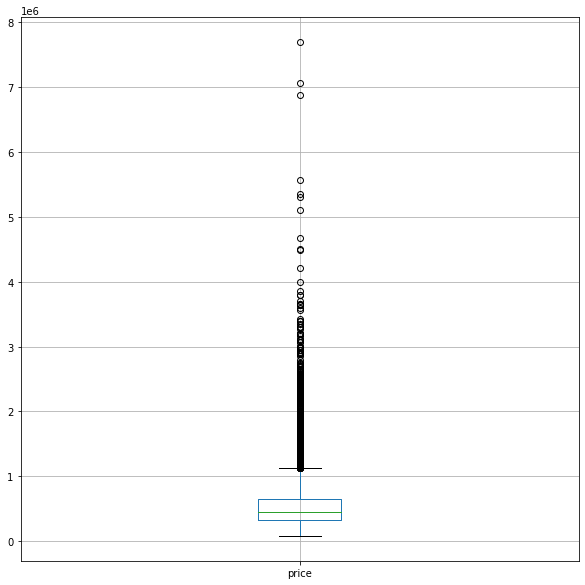

In [9]:
#Create boxplot of price
house_df.boxplot(['price'], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4576859a10>,
      dtype=object)

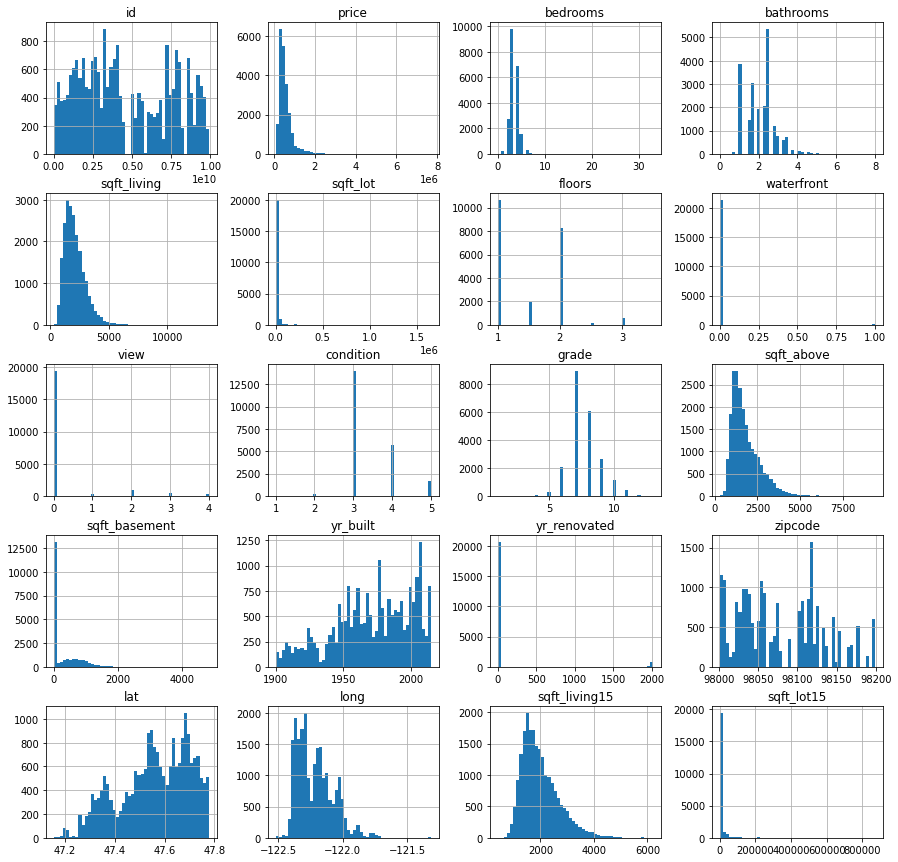

In [10]:
#histograms of our data
house_df.hist(bins=50, figsize=(15, 15))

In [11]:
#Drop ID column
house_df = house_df.drop(['id'], axis=1)
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [12]:
#date time conversion
house_df['date'] = pd.to_datetime(house_df['date'])
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
#Replace all 0 in "yr_renovated" with NaN
#house_df["yr_renovated"] = house_df["yr_renovated"].astype(int).replace(0, np.nan)
#house_df

In [14]:
house_df.count()

date             21611
price            21611
bedrooms         21611
bathrooms        21611
sqft_living      21611
sqft_lot         21611
floors           21611
waterfront       21611
view             21611
condition        21611
grade            21611
sqft_above       21611
sqft_basement    21611
yr_built         21611
yr_renovated     21611
zipcode          21611
lat              21611
long             21611
sqft_living15    21611
sqft_lot15       21611
dtype: int64

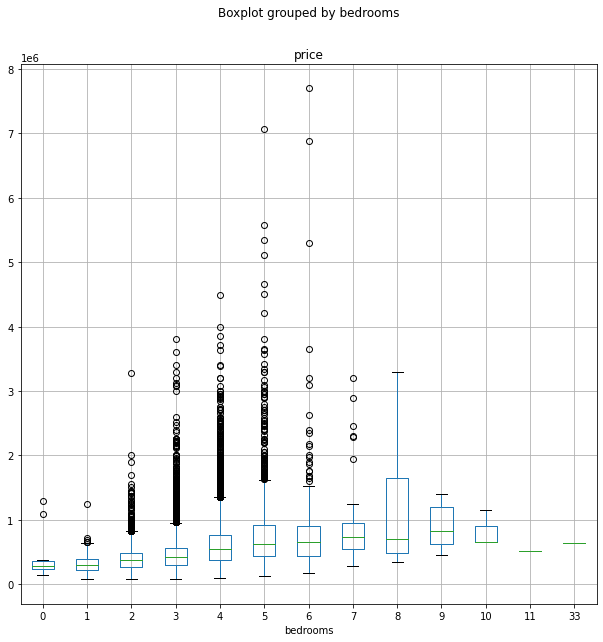

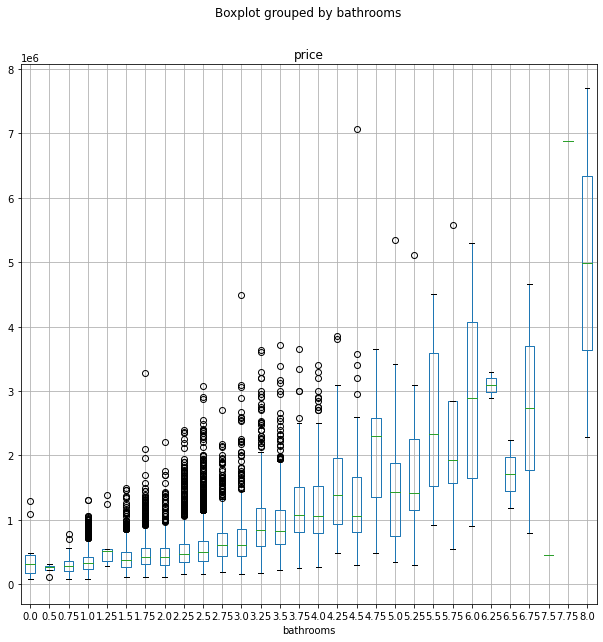

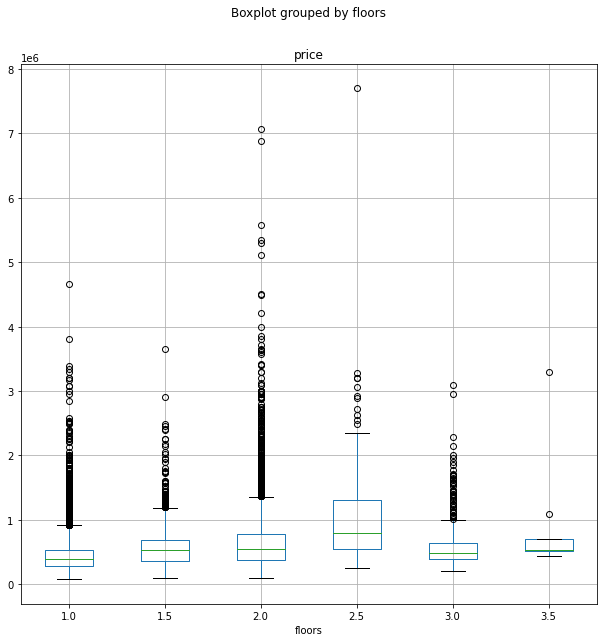

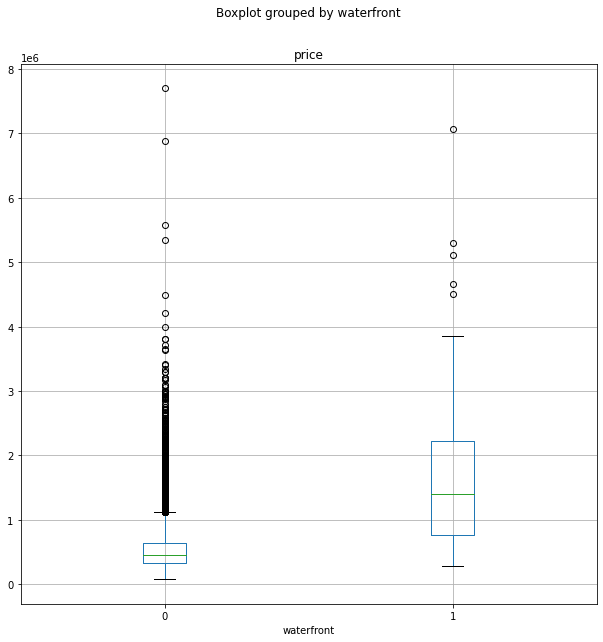

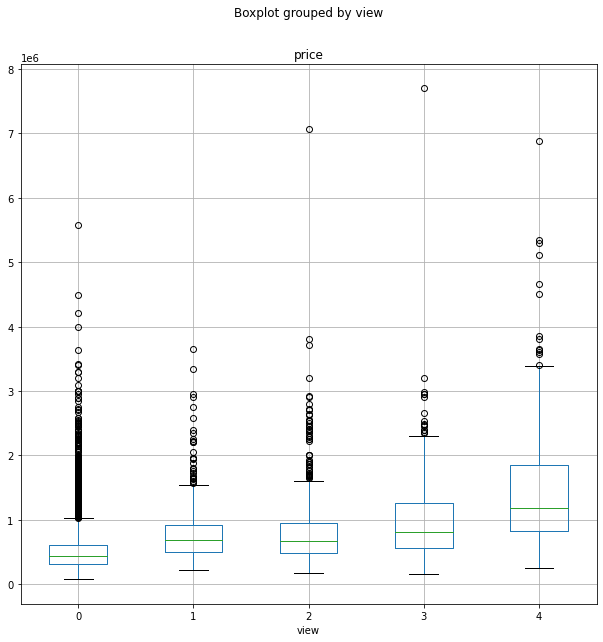

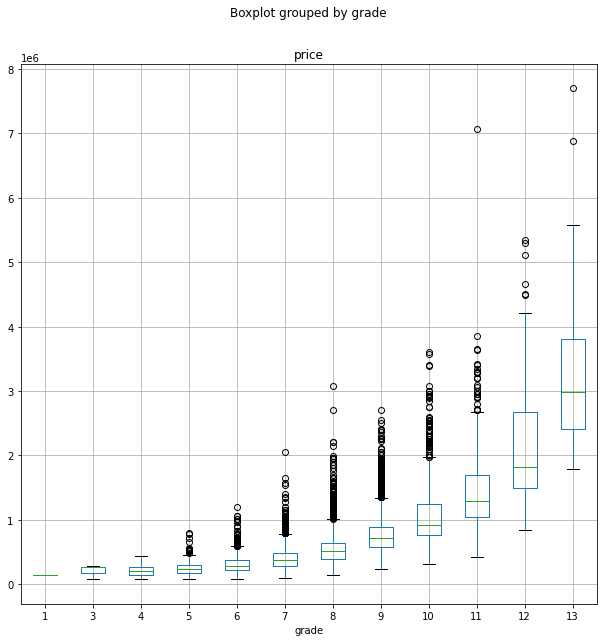

In [15]:
#histograms of our non-continuous or discrete data sets

house_df.boxplot('price','bedrooms', figsize=(10, 10))
house_df.boxplot('price','bathrooms', figsize=(10, 10))
house_df.boxplot('price', 'floors', figsize=(10, 10))
house_df.boxplot('price', 'waterfront', figsize=(10, 10))
house_df.boxplot('price', 'view', figsize=(10, 10))
house_df.boxplot('price', 'grade', figsize=(10, 10))

# **Linear Regression With One Dependent Variable**

In [16]:
#Test Data for Goodness of Fit
expected = [50, 50, 50, 50, 50]
observed = [50, 60, 40, 47, 53]

#perform Goodness of Fit Test
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=4.359999999999999, pvalue=0.3594720674366307)

In [17]:
#Linear Regression with One Dependent Variable
train_data, test_data = train_test_split(house_df, train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['bedrooms'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['bedrooms'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,house_df[['bedrooms']],house_df['price'],cv=5).mean(),'.3f'))

#Print Findings of Regression
print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

#Create Table and Display Results
r = evaluation.shape[0]
evaluation.loc[r] = ['Single Regression','bedrooms',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 526429.327
Intercept: 129518.75568788679
Coefficient: [122753.60239898]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Single Regression,bedrooms,324703.249,0.095,-,0.096,-,0.092


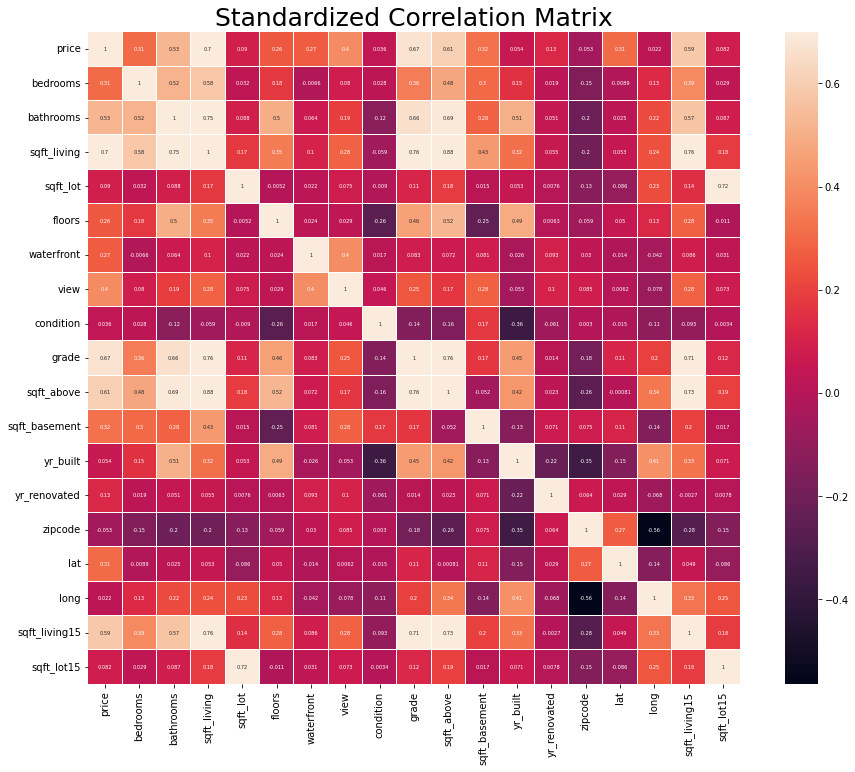

In [18]:
#Correlation within our data - First Visual
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']


mask = np.zeros_like(house_df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Standardized Correlation Matrix',fontsize=25)

corrMatrix = house_df.corr()
sns.heatmap(corrMatrix, linewidths=0.1,vmax=0.7,square=True,linecolor='w', annot=True, annot_kws={"size":5})
plt.show()

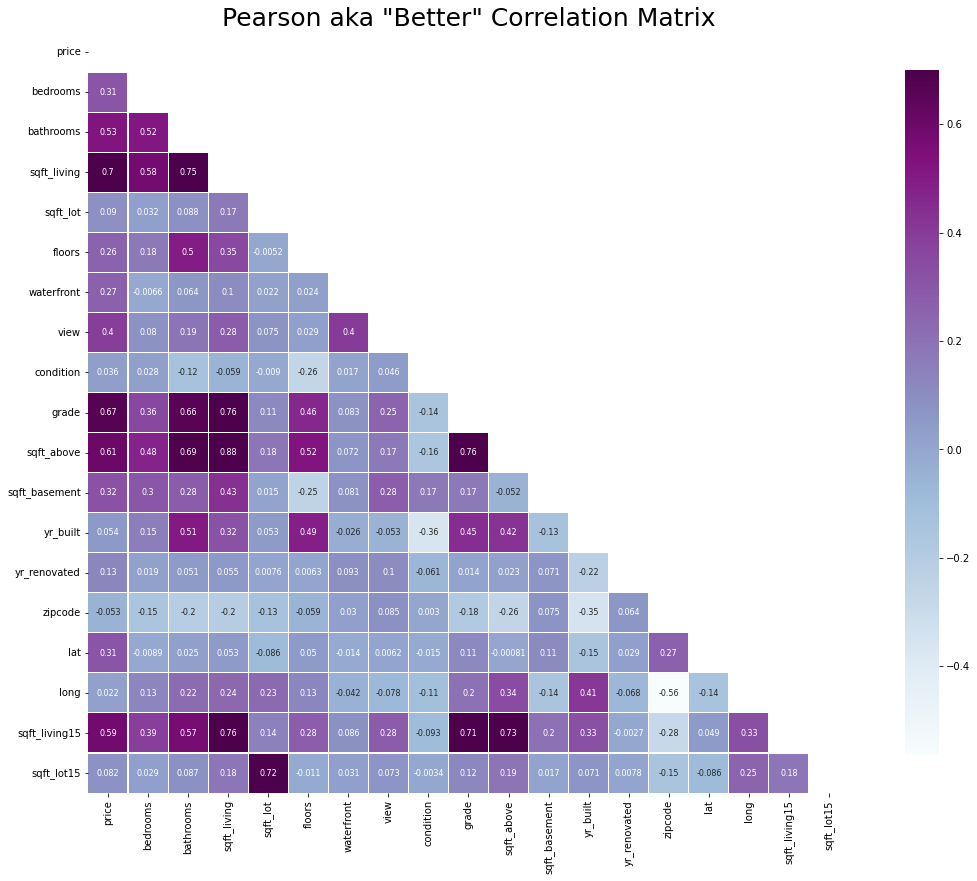

In [19]:
#Correlation within our data - Second Visual
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(house_df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Pearson aka "Better" Correlation Matrix',fontsize=25)
    
sns.heatmap(house_df[features].corr(),linewidths=0.1,vmax=0.7,square=True,cmap="BuPu", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# **Linear Regressions With Multiple Dependent Variables**

In [20]:
#Define Adj. R-Squared
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [21]:
#Linear Regression with Multiple Dependent Variables
#WITHOUT yr_renovated

train_data_dm,test_data_dm = train_test_split(house_df,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot',
            'view','grade','yr_built']

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,house_df[features],house_df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression1','No yr_renovated',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 6582066.798025793
Coefficients: [-4.41657083e+04  5.48836675e+04  1.75158555e+02 -3.16465623e-01
  7.08916983e+04  1.25732032e+05 -3.72771169e+03]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression1,No yr_renovated,213399.277,0.640,0.64,0.609,0.609,0.632
0,Single Regression,bedrooms,324703.249,0.095,-,0.096,-,0.092


Linear Regression End

In [22]:
# Import additional dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [23]:
# Set X and Y variables
X = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','condition','grade','yr_built', 'zipcode']].values
y = house_df['price'].values

In [24]:
# Set train, test, split parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
# Set variable for MinMaxScaler
scaler= MinMaxScaler()

In [26]:
# Set X Train 
X_train= scaler.fit_transform(X_train)

In [27]:
# Set X test
X_test= scaler.transform(X_test)

In [28]:
# Check rows,columns in X_train
X_train.shape

(15127, 10)

In [29]:
# Set input dim
input_dim = X_train.shape[1]

In [30]:
# Setup Keras model
model = Sequential()

model.add(Dense(19, input_dim=input_dim, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer= 'Adam',loss= 'mse')

In [31]:
# Fit model
model.fit(x= X_train, y= y_train, validation_data= (X_test, y_test), batch_size= 128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 426893639680.0000 - val_loss: 425476325376.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 426755588096.0000 - val_loss: 425096282112.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 425688694784.0000 - val_loss: 422939656192.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 421394022400.0000 - val_loss: 415701499904.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 409896321024.0000 - val_loss: 399036743680.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 387112108032.0000 - val_loss: 369373839360.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 350557765632.0000 - val_loss: 325816320000.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 301437124608.0000 - val_loss: 271435612160.0000
Epoch 9/400
119/

In [32]:
# Check losses in model
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.268936e+11,4.254763e+11
1,4.267556e+11,4.250963e+11
2,4.256887e+11,4.229397e+11
3,4.213940e+11,4.157015e+11
4,4.098963e+11,3.990367e+11
...,...,...
395,3.872335e+10,3.955586e+10
396,3.871224e+10,3.953900e+10
397,3.871703e+10,3.953690e+10
398,3.871461e+10,3.951621e+10


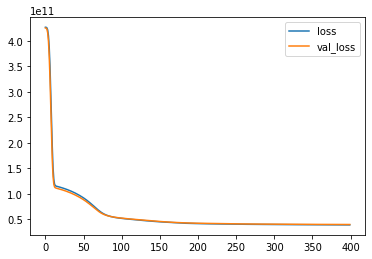

In [33]:
# Plot losses
losses.plot()

In [34]:
# Set Prediction variable
prediction = model.predict(X_test)

In [35]:
# Mean absolute error testing
mean_absolute_error(y_test, prediction)

129489.4674065488

In [36]:
# Mean square testing
mean_squared_error(y_test, prediction)

39518350419.70342

In [37]:
# Explained variance score
explained_variance_score(y_test, prediction)

0.7026798287237498

In [49]:
# Predict the price of a certain house in our data
predict_price= house_df.drop(['price', 'date', 'yr_renovated', 'zipcode', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1).iloc[1]
predict_price

bedrooms          3.00
bathrooms         2.25
sqft_living    2570.00
sqft_lot       7242.00
floors            2.00
waterfront        0.00
view              0.00
condition         3.00
grade             7.00
yr_built       1951.00
Name: 1, dtype: float64

In [50]:
# Scale predicted prices
predict_price = scaler.transform(predict_price.values.reshape(-1, 10))

In [51]:
# Predict house price of first house in our dataset
model.predict(predict_price)

array([[4.0269206e+08]], dtype=float32)

In [53]:
# Compare predicted price against actual price
house_df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
